# Heart Disease Predictions

#### Source https://www.kaggle.com/kellibelcher/heart-disease-predictions-eda-with-plotly/data

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:
* Cleveland: 303 observations
* Hungarian: 294 observations
* Switzerland: 123 observations
* Long Beach VA: 200 observations
* Stalog (Heart) Data Set: 270 observations

Total: 1190 observations
Duplicated: 272 observations

Final dataset: 918 observations

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/


## Exploratory Data Analysis (EDA)

### Overview Stage
* Read the csv
* Look for basic information about the dataset

In [8]:
# Import require library for EDA
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib as mpl

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import plotly.io as pio
pio.renderers.default = "svg"

import warnings
warnings.filterwarnings('ignore') 

# set options
pd.set_option('max_rows', 1000)

In [3]:
# load csv file 
df = pd.read_csv('./heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


918 entries with 12 columns (7 numeric & 5 Categorical)

In [5]:
print(df.isnull().sum())  # data is clean without missing values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Data looks clean without any missing values

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


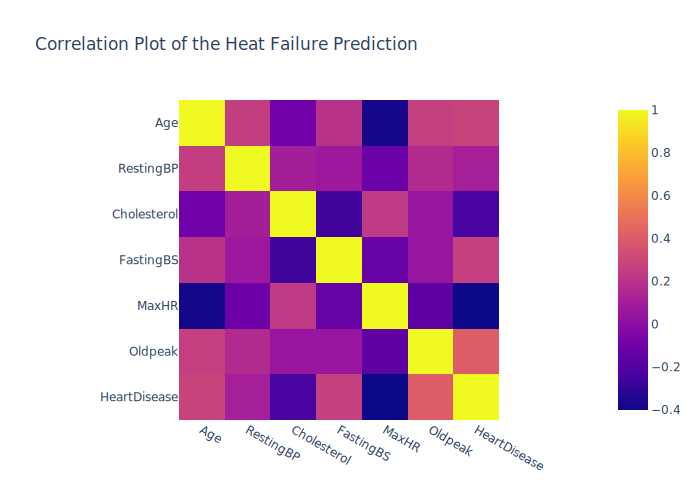

In [9]:
px.imshow(df.corr(), title="Correlation Plot of the Heat Failure Prediction")

Look at the correlation plot we can deduce
* Most of the correlations is pretty weak (between 0.4 & -0.4)
* There is a negative correlation between maxium heart rate & heart disease
* There is a negative correlation between cholesterol & heart disease

---

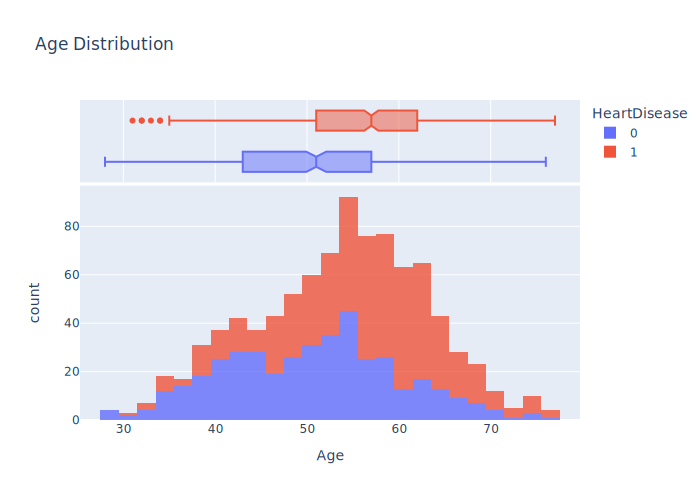

In [10]:
fig = px.histogram(df, x='Age', title='Age Distribution' , color='HeartDisease', opacity=0.8, marginal="box")
fig.show()

There seem to be a strong correlation between age and heart disease with meadian age of 57.

---

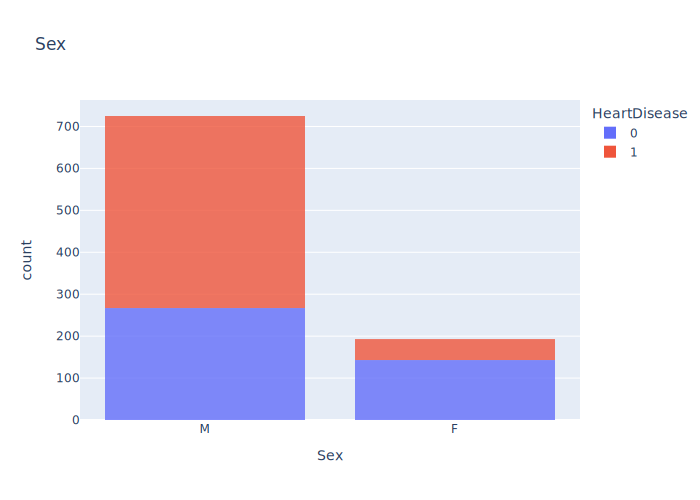

Sex  HeartDisease
F    0               0.740933
     1               0.259067
M    1               0.631724
     0               0.368276
Name: HeartDisease, dtype: float64

In [11]:
fig = px.histogram(df, x='Sex', title='Sex', color='HeartDisease', opacity=0.8)
fig.show()

df.groupby('Sex')['HeartDisease'].value_counts(normalize=True)

Gender seem to play a role in heart disease where the male gender is more likely to have heart disease vs female.  Here only ~26% of feamale have heart disease vs ~63% of mail have heart disease

---

In [118]:
fig = px.histogram(df, x='ChestPainType', title='Chest Pain Type', color='HeartDisease', opacity=0.8)
fig.show()

df.groupby('ChestPainType')['HeartDisease'].value_counts(normalize=True)

ChestPainType  HeartDisease
ASY            1               0.790323
               0               0.209677
ATA            0               0.861272
               1               0.138728
NAP            0               0.645320
               1               0.354680
TA             0               0.565217
               1               0.434783
Name: HeartDisease, dtype: float64

Patients with asymptomatic (ASY) chest pain seem be more prone to heart disease since ~79% of patient with ASY has heart disease.

---

In [94]:
fig = px.histogram(df, x='RestingBP', title='Resting Blood Pressure', color='HeartDisease', opacity=0.8)
fig.show()

Not much from BP but there seem to be an outlier that we should address in the next section

---

In [86]:
fig = px.histogram(df, x='Cholesterol', title='Cholesterol', color='HeartDisease', opacity=0.8)
fig.show()


Not much from Cholesterol but there seem to be an outlier that we should address in the next section

---

In [87]:
fig = px.histogram(df, x='FastingBS', title='FastingBS', color='HeartDisease', opacity=0.8)
fig.show()

In [88]:
fig = px.histogram(df, x='RestingECG', title='RestingECG', color='HeartDisease', opacity=0.8)
fig.show()

HeartDisease  Sex
0             M      0.651220
              F      0.348780
1             M      0.901575
              F      0.098425
Name: Sex, dtype: float64

In [89]:
fig = px.histogram(df, x='MaxHR', title='MaxHR', color='HeartDisease', opacity=0.8)
fig.show()

In [151]:
fig = px.histogram(df, x='ExerciseAngina', title='Exercise Angina', color='HeartDisease', opacity=0.8)
fig.show()

Patient with exercise-induced angina of Y is more likely to have heart disease

In [91]:
fig = px.histogram(df, x='Oldpeak', title='Oldpeak', color='HeartDisease', opacity=0.8)
fig.show()

In [92]:
fig = px.histogram(df, x='ST_Slope', title='ST_Slope', color='HeartDisease', opacity=0.8)
fig.show()

* When the slope of the peak exercise ST segment if up then the patient is less likely to have heart disease
* When the slop is flat the patient is more likely to have heart disease

---

### Overall Insight from the Exploratory Data Analysis